# Exploratory Data Visualization
## Visualizing Earnings Based On College Majors
We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Header | Description
---|---------
`Rank` | Rank by median earnings
`Major_code` | Major code, FO1DP in ACS PUMS
`Major` | Major description
`Major_category` | Category of major from Carnevale et al
`Total` | Total number of people with major
`Sample_size` | Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
`Men` | Male graduates
`Women` | Female graduates
`ShareWomen` | Women as share of total
`Employed` | Number employed (ESR == 1 or 2)
`Full_time` | Employed 35 hours or more
`Part_time` | Employed less than 35 hours
`Full_time_year_round` | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
`Unemployed` | Number unemployed (ESR == 3)
`Unemployment_rate` | Unemployed / (Unemployed + Employed)
`Median` | Median earnings of full-time, year-round workers
`P25th` | 25th percentile of earnings
`P75th` | 75th percentile of earnings
`College_jobs` | Number with job requiring a college degree
`Non_college_jobs` | Number with job not requiring a college degree
`Low_wage_jobs` | Number in low-wage service jobs

### Introduction
- Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.

    - Import pandas and matplotlib into the environment.
    - Run the Jupyter magic %matplotlib inline so that plots are displayed inline.
- Read the dataset into a DataFrame and start exploring the data.

    - Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads.
    - Use DataFrame.iloc[] to return the first row formatted as a table.
    - Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
    - Use DataFrame.describe() to generate summary statistics for all of the numeric columns.
- Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

    - Look up the number of rows in recent_grads and assign the value to raw_data_count.
    - Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.
    - Look up the number of rows in recent_grads now and assign the value to cleaned_data_count. If you compare cleaned_data_count and raw_data_count, you'll notice that only one row contained missing values and was dropped.

### Import Statements

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

### Stylistics

In [2]:
 # For Displaying of Plots without using plt.show()
%matplotlib inline

np.printoptions(precision=2) # Display printed numbers with 2 decimal precision
plt.style.use("dark_background") # Use Dark Theme for Plots

# Display the whole DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

### Loading the Dataset

In [3]:
recent_grads = pd.read_csv("../recent-grads.csv")

### Exploring the Dataset

Before we can actually work on the data. It is compulsary to understand the data so we know what we are working on and what is possible to question and analyze.

In [4]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

We can confirm that the dataset has been read correctly with only 2 are read as objects because they are strings of category and the rest are integer values. But we can see that there are some inconsistent Non-Null Count. It means that there are some null values in these columns that needs to be cleaned. Let's take note of this one.

In [106]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,233205,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,251540,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,144512,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,171385,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,147335,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440


In [6]:
recent_grads[5:].tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


The last two cells explores the first and last 5 rows of the dataset. We can cleary see that the `Rank` Column gives the dataset a natural ordering with the Rank 1 being the highest median salary.

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Looking at the DataFrame above, we can see that the count for `Total` and `Men` lacks a single entry. This Means that there are null/missing values in that column. Let's further investigate using `isnull()` command.

In [8]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

We can see here that there are really is a one null value in our dataset. Let's clean it in the next section

### Cleaning

In [9]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

The code above retrives the count of the rows of the dataset. This will be compared later on when the dataset has been cleaned.

In [10]:
recent_grads = recent_grads.dropna()

Using `df.dropna()` removes the **row** with missing values. I opted to remove the row/observation because a single row will not affect much of our dataset once removed.

In [11]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

We can confirm that we have removed 1 row since the row of our dataset decreased by 1.

### Pandas, Scatter Plots
- Generate scatter plots in separate jupyter notebook cells to explore the following relations:
    - Sample_size and Median
    - Sample_size and Unemployment_rate
    - Full_time and Median
    - ShareWomen and Unemployment_rate
    - Men and Median
    - Women and Median
- Use the plots to explore the following questions:
    - Do students in more popular majors make more money?
    - Do students that majored in subjects that were majority female make more money?
    - Is there any link between the number of full-time employees and median salary?

### Analysis
With the dataset has been explored and cleaned, it is time to answer question with regards to the data at hand.

#### Q1: What are the most popular Major Category in the Dataset?

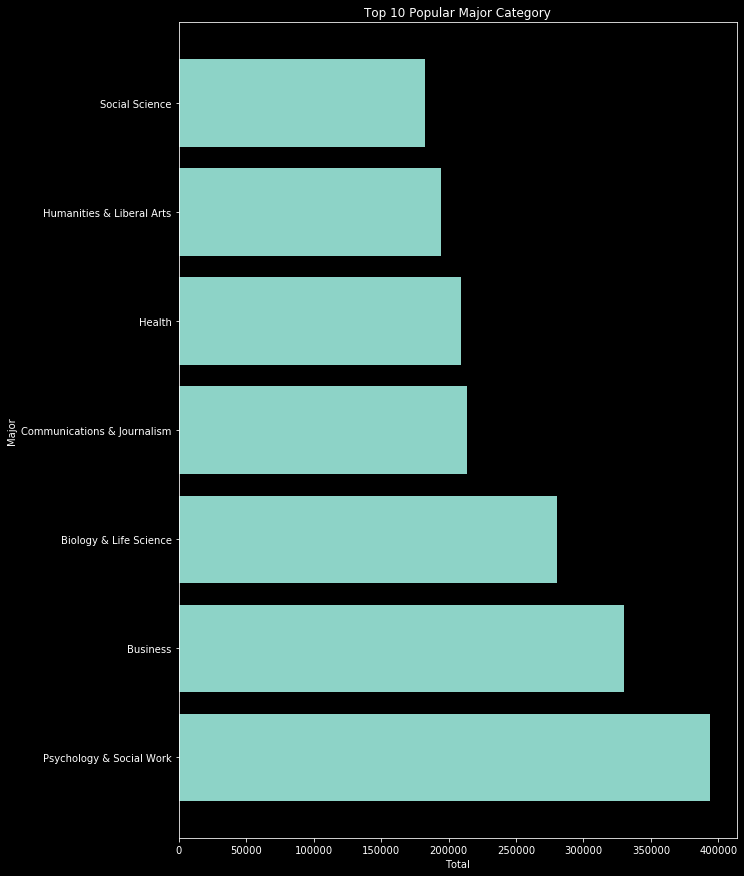

In [136]:
plt.figure(figsize=(10,15))
_ = plt.barh(y=recent_grads["Major_category"].head(10), width=recent_grads["Total"].head(10))
_ = plt.title("Top 10 Popular Major Category")
_ = plt.xlabel("Total")
_ = plt.ylabel("Major")

In [ ]:
Top_5_major = recent_grads.groupby("Major_category").sum().sort_values(by="Total", ascending=False).head(6)
Top_5_major["Total"]

#### Q2: What among the Majors has the most number of women.

In [ ]:
plt.figure(figsize=(10 , 15))
_ = plt.barh(width=recent_grads["Women"], y=recent_grads["Major_category"])
_ = plt.title("Most Number of Female Student in Majors")
_ = plt.xlabel("Number of Women")
_ = plt.ylabel("Major Category")

#### Q3: What among the Majors has the most number of men.

In [ ]:
plt.figure(figsize=(10 , 15))
_ = plt.barh(width=recent_grads["Men"], y=recent_grads["Major_category"])
_ = plt.title("Most Number of Men Student in Majors")
_ = plt.xlabel("Number of Men")
_ = plt.ylabel("Major Category")

#### Q4: What among the majors has the most graduate in it?

In [ ]:
graduates = recent_grads["Men"] + recent_grads["Women"]

The above code aggregates Male and Female graduates. It will serve as a count on how many graduates on each Major category

In [ ]:
_ = plt.figure(figsize=(10, 15))
_ = plt.barh(width=graduates, y=recent_grads["Major_category"])
_ = plt.title("Number of Graduates on Each Major")
_ = plt.xlabel("Number of Graduates")
_ = plt.ylabel("Major")

In [107]:
#### Is there any link between the number of full-time employees and median salary?
According to the plot below, Sample_size and median have no correlation. Meaning, the change of value in the Sample_size has no effect in the change of Median.

Major_category
Business                     1302376.0
Humanities & Liberal Arts     713468.0
Education                     559129.0
Engineering                   537583.0
Social Science                529966.0
Psychology & Social Work      481007.0
Name: Total, dtype: float64

#### Q2: What among the Majors has the most number of women.

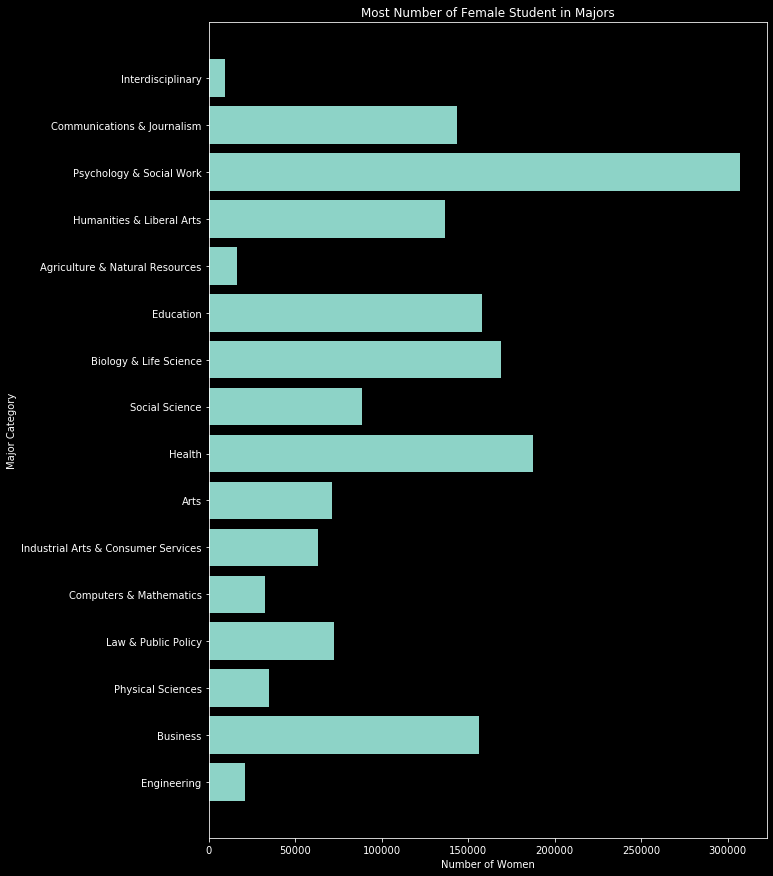

In [43]:
plt.figure(figsize=(10 , 15))
_ = plt.barh(width=recent_grads["Women"], y=recent_grads["Major_category"])
_ = plt.title("Most Number of Female Student in Majors")
_ = plt.xlabel("Number of Women")
_ = plt.ylabel("Major Category")

#### Q3: What among the Majors has the most number of men.

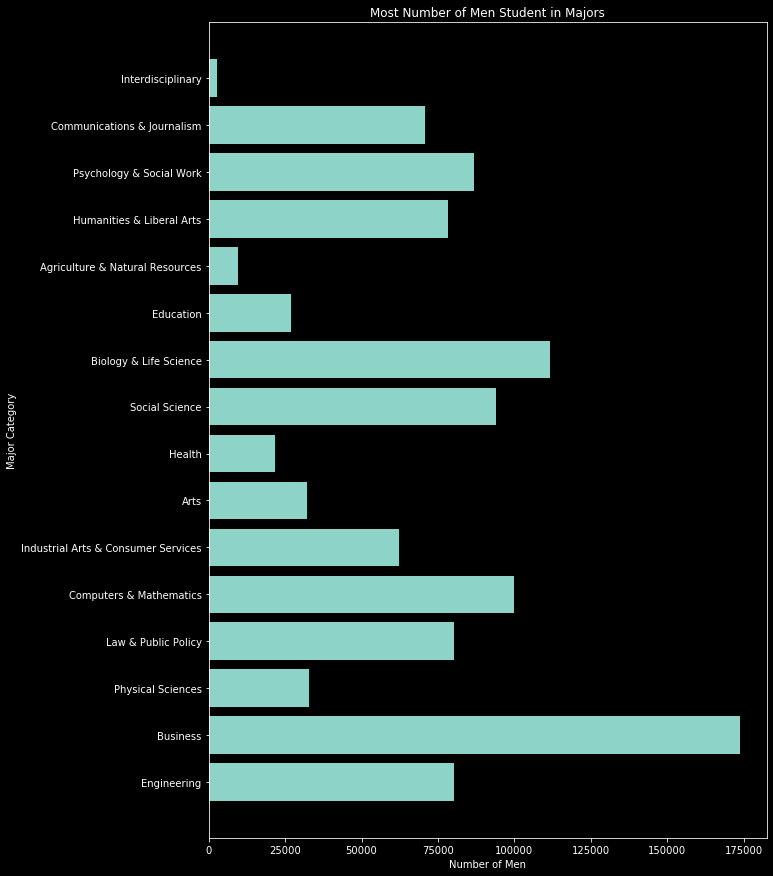

In [53]:
plt.figure(figsize=(10 , 15))
_ = plt.barh(width=recent_grads["Men"], y=recent_grads["Major_category"])
_ = plt.title("Most Number of Men Student in Majors")
_ = plt.xlabel("Number of Men")
_ = plt.ylabel("Major Category")

#### Q4: What among the majors has the most graduate in it?

In [50]:
graduates = recent_grads["Men"] + recent_grads["Women"]

The above code aggregates Male and Female graduates. It will serve as a count on how many graduates on each Major category

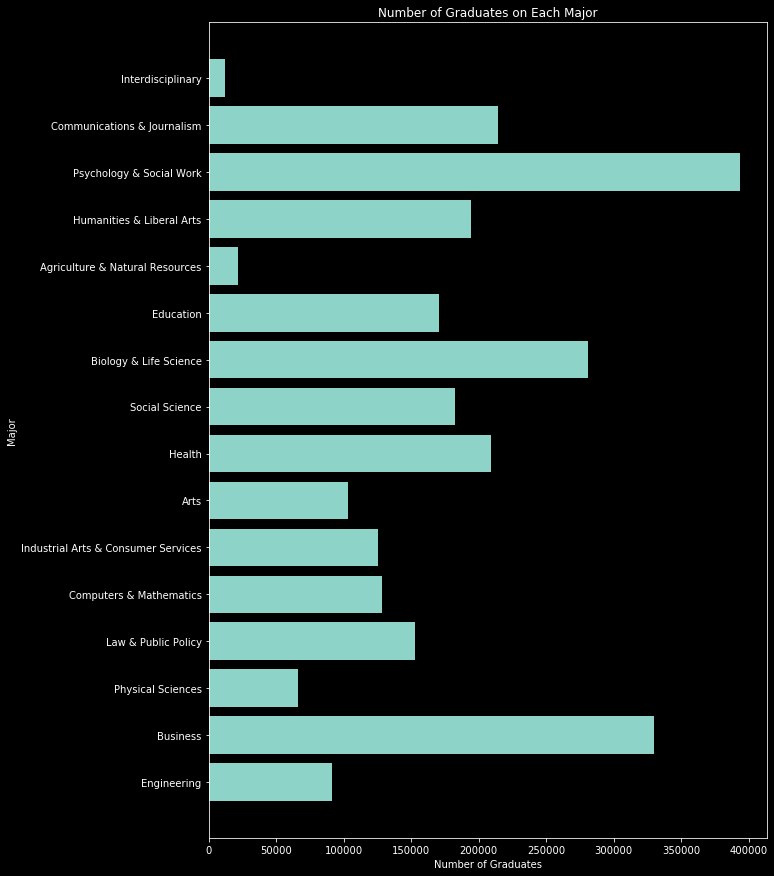

In [51]:
_ = plt.figure(figsize=(10, 15))
_ = plt.barh(width=graduates, y=recent_grads["Major_category"])
_ = plt.title("Number of Graduates on Each Major")
_ = plt.xlabel("Number of Graduates")
_ = plt.ylabel("Major")

#### Is there any link between the number of full-time employees and median salary?
According to the plot below, Sample_size and median have no correlation. Meaning, the change of value in the Sample_size has no effect in the change of Median.

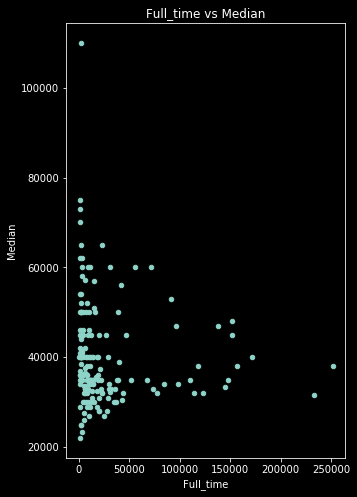

In [13]:
_ = recent_grads.plot(x="Full_time", 
                      y="Median", 
                      kind="scatter", 
                      title="Full_time vs Median", 
                      figsize=(5, 8))

#### Is there any link between the number of full-time employees and unemployment rate?

According to the plot below, Sample_size and Unemployment_rate have no correlation. Meaning, the change of value in the Sample_size has no effect in the change of Unemployment_rate.

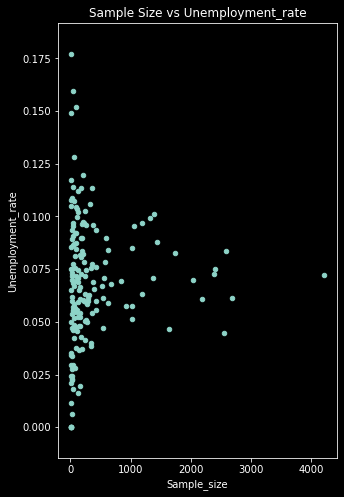

In [14]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter", title="Sample Size vs Unemployment_rate", figsize=(5, 8))

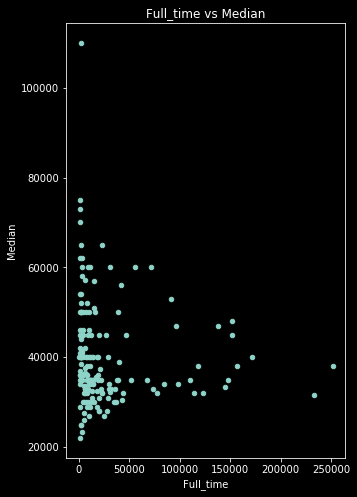

In [15]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter", title="Full_time vs Median", figsize=(5, 8))

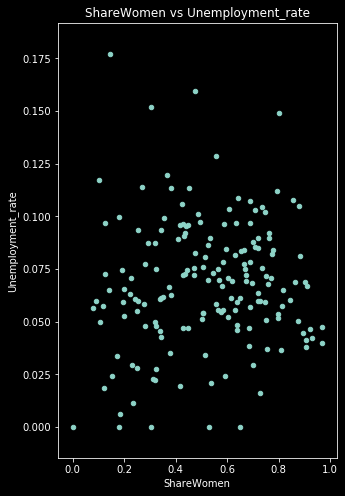

In [16]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter", title="ShareWomen vs Unemployment_rate", figsize=(5, 8))

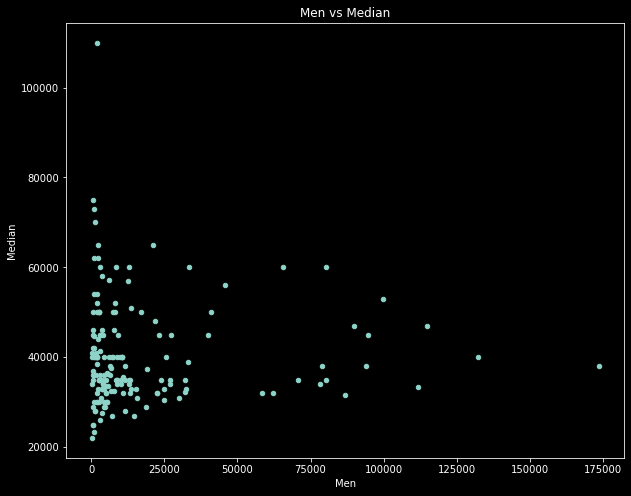

In [17]:
recent_grads.plot(x="Men", y="Median", kind="scatter", title="Men vs Median", figsize=(10, 8))

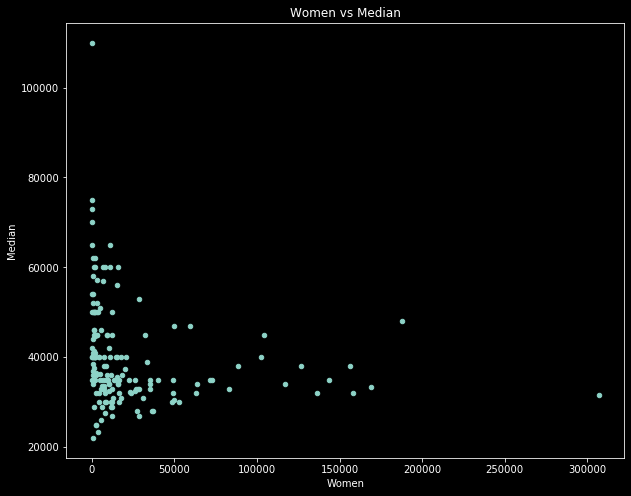

In [18]:
recent_grads.plot(x="Women", y="Median", kind="scatter", title="Women vs Median", figsize=(10, 8))

### Pandas, Histograms
- Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
    - Sample_size
    - Median
    - Employed
    - Full_time
    - ShareWomen
    - Unemployment_rate
    - Men
    - Women
- We encourage you to experiment with different bin sizes and ranges when generating these histograms.

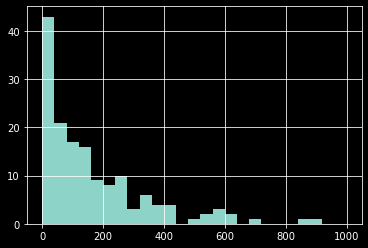

In [19]:
recent_grads["Sample_size"].hist(bins=25, range=(0, 1000))

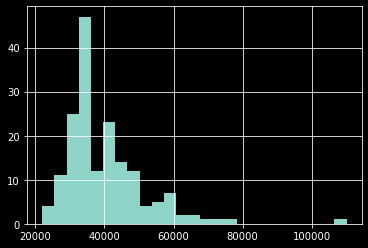

In [20]:
recent_grads["Median"].hist(bins=25, range=(22000, 110000))

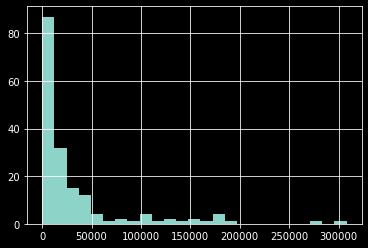

In [21]:
recent_grads["Employed"].hist(bins=25, range=(0, 307933))

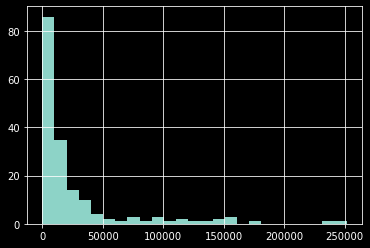

In [22]:
recent_grads["Full_time"].hist(bins=25, range=(0, 251540))

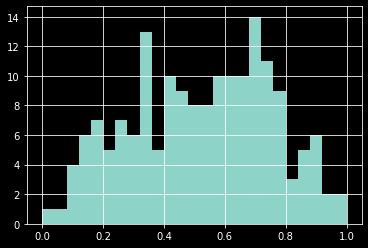

In [23]:
recent_grads["ShareWomen"].hist(bins=25, range=(0, 1))

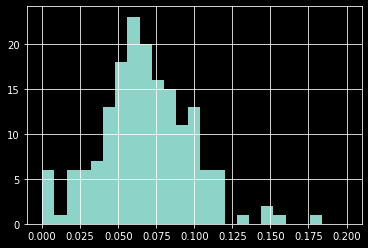

In [24]:
recent_grads["Unemployment_rate"].hist(bins=25, range=(0, 0.2))

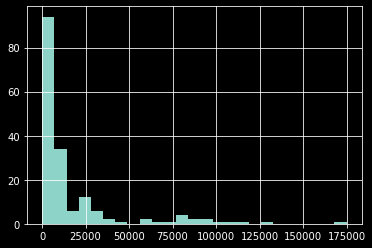

In [25]:
recent_grads["Men"].hist(bins=25, range=(0, 175000))

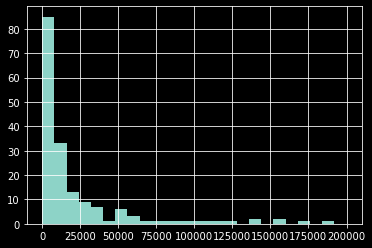

In [26]:
_ = recent_grads["Women"].hist(bins=25, range=(0, 200000))

### Pandas, Scatter Matrix Plot
- Import scatter_matrix from the pandas.plotting module.
- Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
- Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
- Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

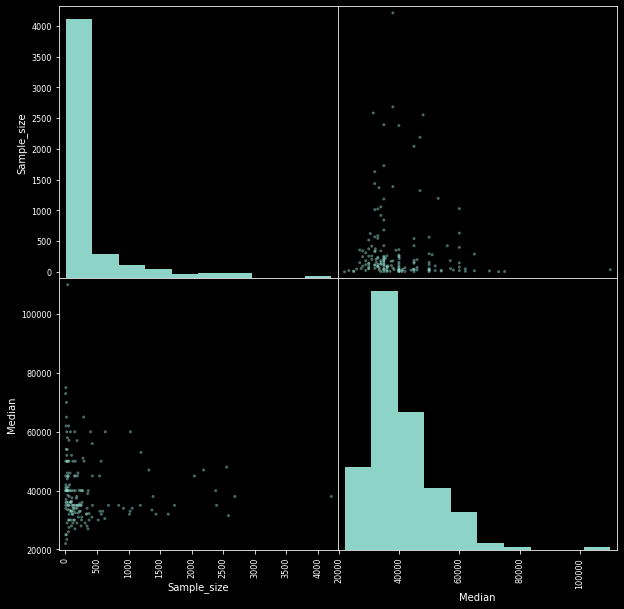

In [27]:
_ = scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10, 10))

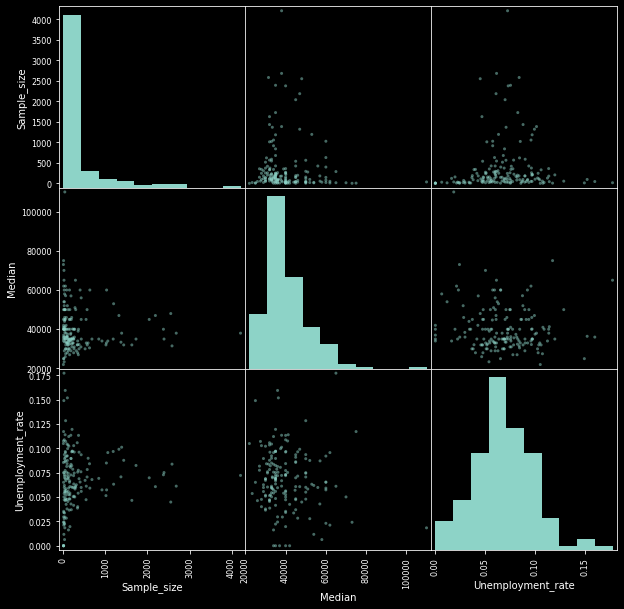

In [28]:
_ = scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10, 10))

### Pandas, Bar Plots
- Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.
- Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

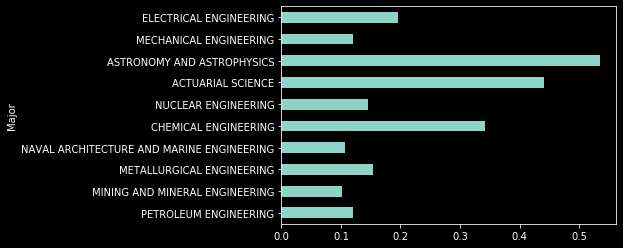

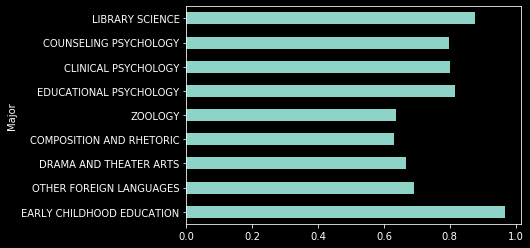

In [29]:
_ = recent_grads[:10].plot.barh(x="Major", y="ShareWomen", legend=False)
_ = recent_grads[163:].plot.barh(x="Major", y="ShareWomen", legend=False)

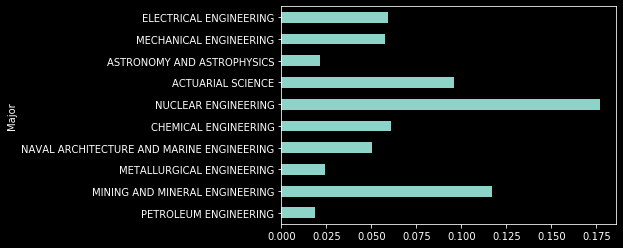

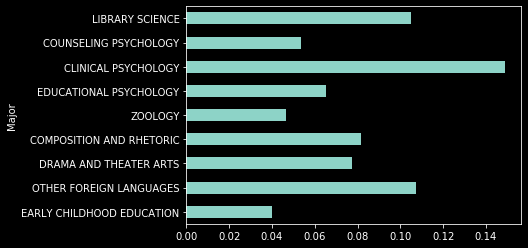

In [30]:
_ = recent_grads[:10].plot.barh(x="Major", y="Unemployment_rate", legend=False)
_ = recent_grads[163:].plot.barh(x="Major", y="Unemployment_rate", legend=False)

_ = recent_grads[:10].plot.barh(x="Major", y="Unemployment_rate", legend=False)
_ = recent_grads[163:].plot.barh(x="Major", y="Unemployment_rate", legend=False)

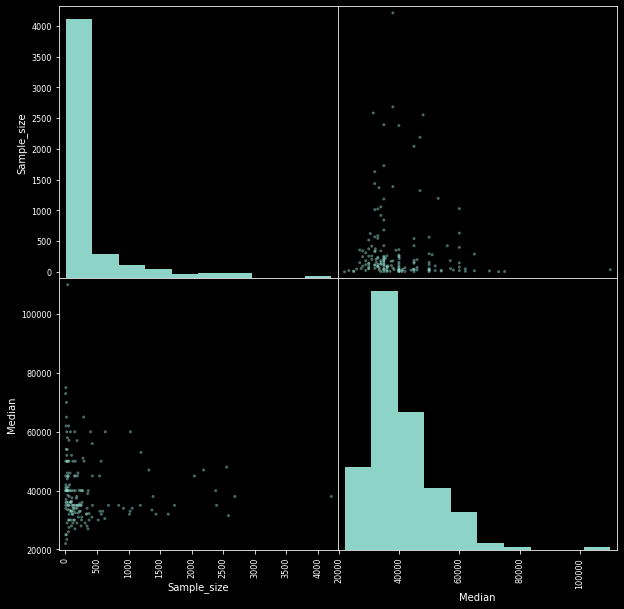

In [31]:
_ = scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10, 10))

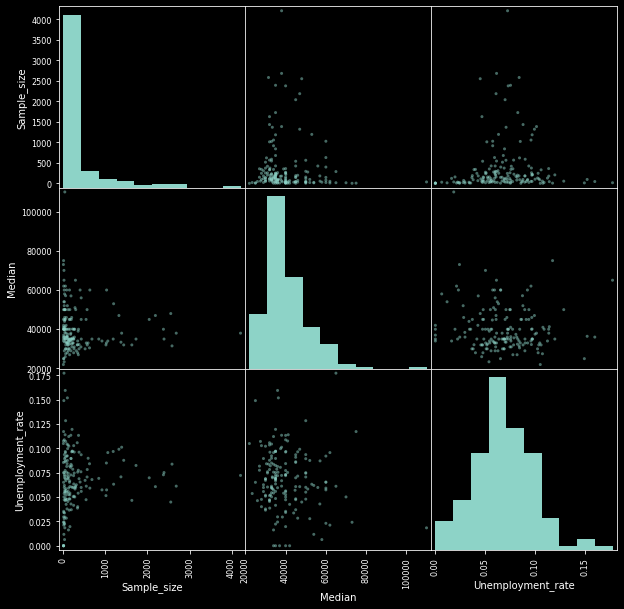

In [32]:
_ = scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10, 10))

### Pandas, Bar Plots
- Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.
- Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

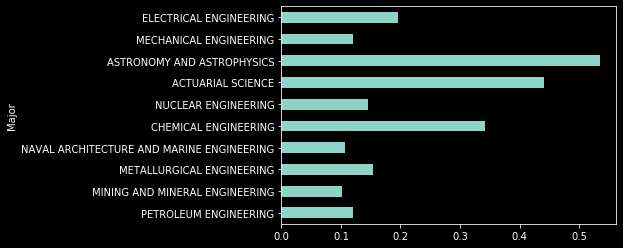

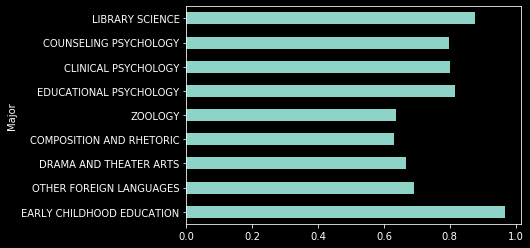

In [33]:
_ = recent_grads[:10].plot.barh(x="Major", y="ShareWomen", legend=False)
_ = recent_grads[163:].plot.barh(x="Major", y="ShareWomen", legend=False)

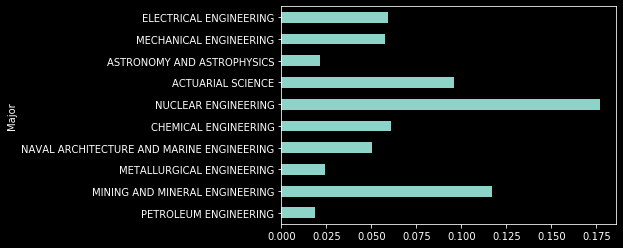

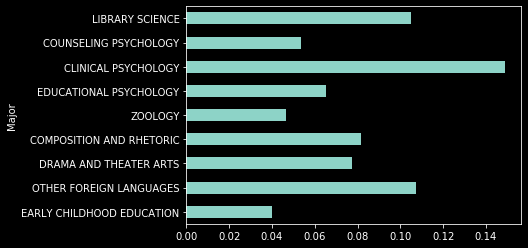

In [34]:
_ = recent_grads[:10].plot.barh(x="Major", y="Unemployment_rate", legend=False)
_ = recent_grads[163:].plot.barh(x="Major", y="Unemployment_rate", legend=False)

In [35]:
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170
